# Educated data analysis

### 1. Importing the data

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [14]:
# Define the sheet names or indices to import
sheet_stats = ['CropStats']

# Import the sheets into a single DataFrame
df = pd.concat(pd.read_excel('../archive/food-twentieth-century-crop-statistics-1900-2017-xlsx.xlsx', sheet_name=sheet_stats))
df

Unnamed: 0  Harvest_year   admin0    admin1   crop  \
CropStats 0               0          1902  Austria       NaN  wheat   
          1               1          1903  Austria       NaN  wheat   
          2               2          1904  Austria       NaN  wheat   
          3               3          1905  Austria       NaN  wheat   
          4               4          1906  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  \
CropStats 0                NaN                  NaN  1902          1.310000   
          1                NaN                  NaN  1903          1.470000   
          2                NaN                  NaN  1904          1.270000   
          3                NaN                  NaN  1905          1.330000   
          4                NaN                  NaN  1906          1.280000   
...                        ...                  ...   ...               ...   
          36702        75520.0             278300.0  2013          3.685117   
          36703        82120.0             309500.0  2014          3.768875   
          36704        89800.0             351300.0  2015          3.912027   
          36705        76590.0             253900.0  2016          3.315054   
          36706       103670.0             419200.0  2017          4.043600   

                 admin2 notes  
CropStats 0         NaN   NaN  
          1         NaN   NaN  
          2         NaN   NaN  
          3         NaN   NaN  
          4         NaN   NaN  
...                 ...   ...  
          36702     NaN   NaN  
          36703     NaN   NaN  
          36704     NaN   NaN  
          36705     NaN   NaN  
          36706     NaN   NaN  

[36707 rows x 11 columns]

In [15]:
df = df[~((df['production (tonnes)'].isnull()) & (df['yield(tonnes/ha)'].isnull() | df['hectares (ha)'].isnull()))]

In [16]:
df

Unnamed: 0  Harvest_year   admin0    admin1   crop  \
CropStats 59             59          1961  Austria       NaN  wheat   
          60             60          1962  Austria       NaN  wheat   
          61             61          1963  Austria       NaN  wheat   
          62             62          1964  Austria       NaN  wheat   
          63             63          1965  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  \
CropStats 59          275822.0                  NaN  1961          2.580000   
          60          270351.0                  NaN  1962          2.612000   
          61          274722.0                  NaN  1963          2.510000   
          62          282967.0                  NaN  1964          2.652000   
          63          275654.0                  NaN  1965          2.397000   
...                        ...                  ...   ...               ...   
          36702        75520.0             278300.0  2013          3.685117   
          36703        82120.0             309500.0  2014          3.768875   
          36704        89800.0             351300.0  2015          3.912027   
          36705        76590.0             253900.0  2016          3.315054   
          36706       103670.0             419200.0  2017          4.043600   

                 admin2 notes  
CropStats 59        NaN   NaN  
          60        NaN   NaN  
          61        NaN   NaN  
          62        NaN   NaN  
          63        NaN   NaN  
...                 ...   ...  
          36702     NaN   NaN  
          36703     NaN   NaN  
          36704     NaN   NaN  
          36705     NaN   NaN  
          36706     NaN   NaN  

[35192 rows x 11 columns]

In [17]:
# Find the indexes of rows where 'production' is null
null_indexes = df[df['production (tonnes)'].isnull()].index

# Loop through the null indexes and calculate the missing 'production' values
for index in null_indexes:
    df.at[index, 'production (tonnes)'] = df.at[index, 'yield(tonnes/ha)'] * df.at[index, 'hectares (ha)']

In [18]:
df

Unnamed: 0  Harvest_year   admin0    admin1   crop  \
CropStats 59             59          1961  Austria       NaN  wheat   
          60             60          1962  Austria       NaN  wheat   
          61             61          1963  Austria       NaN  wheat   
          62             62          1964  Austria       NaN  wheat   
          63             63          1965  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  \
CropStats 59          275822.0           711620.760  1961          2.580000   
          60          270351.0           706156.812  1962          2.612000   
          61          274722.0           689552.220  1963          2.510000   
          62          282967.0           750428.484  1964          2.652000   
          63          275654.0           660742.638  1965          2.397000   
...                        ...                  ...   ...               ...   
          36702        75520.0           278300.000  2013          3.685117   
          36703        82120.0           309500.000  2014          3.768875   
          36704        89800.0           351300.000  2015          3.912027   
          36705        76590.0           253900.000  2016          3.315054   
          36706       103670.0           419200.000  2017          4.043600   

                 admin2 notes  
CropStats 59        NaN   NaN  
          60        NaN   NaN  
          61        NaN   NaN  
          62        NaN   NaN  
          63        NaN   NaN  
...                 ...   ...  
          36702     NaN   NaN  
          36703     NaN   NaN  
          36704     NaN   NaN  
          36705     NaN   NaN  
          36706     NaN   NaN  

[35192 rows x 11 columns]

In [19]:
df.isnull().sum()

Unnamed: 0                 0
Harvest_year               0
admin0                     0
admin1                  2631
crop                       0
hectares (ha)            117
production (tonnes)        0
year                       0
yield(tonnes/ha)        1126
admin2                 35192
notes                  29551
dtype: int64

In [20]:
notes_values = df['notes'].dropna().tolist()

for value in notes_values:
    print(value)


FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country

In [21]:
df = df.drop(columns=['notes', 'admin2'])
# Rename 'admin0' to 'Country' and 'admin1' to 'City'
df = df.rename(columns={'admin0': 'Country', 'admin1': 'City'})
df

Unnamed: 0  Harvest_year  Country      City   crop  \
CropStats 59             59          1961  Austria       NaN  wheat   
          60             60          1962  Austria       NaN  wheat   
          61             61          1963  Austria       NaN  wheat   
          62             62          1964  Austria       NaN  wheat   
          63             63          1965  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  
CropStats 59          275822.0           711620.760  1961          2.580000  
          60          270351.0           706156.812  1962          2.612000  
          61          274722.0           689552.220  1963          2.510000  
          62          282967.0           750428.484  1964          2.652000  
          63          275654.0           660742.638  1965          2.397000  
...                        ...                  ...   ...               ...  
          36702        75520.0           278300.000  2013          3.685117  
          36703        82120.0           309500.000  2014          3.768875  
          36704        89800.0           351300.000  2015          3.912027  
          36705        76590.0           253900.000  2016          3.315054  
          36706       103670.0           419200.000  2017          4.043600  

[35192 rows x 9 columns]

In [22]:
grouped_data = df.groupby(['Country', 'year'])['production (tonnes)'].sum().reset_index()
grouped_data

,Country,year,production (tonnes)
0,Argentina,1900,4545130.000
1,Argentina,1901,3668403.328
2,Argentina,1902,6607305.400
3,Argentina,1903,7978701.728
4,Argentina,1904,7677243.520
...,...,...,...
2494,Uruguay,2015,1670500.000
2495,Uruguay,2016,1244000.000
2496,Uruguay,2017,911000.000
2497,Uruguay,2018,1036600.000


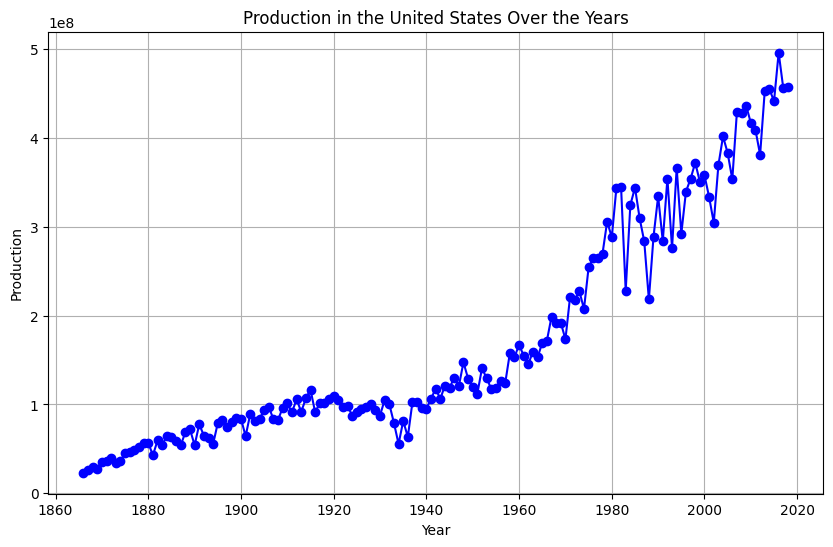

In [23]:
us_df = grouped_data[grouped_data['Country'] == 'United States']


plt.figure(figsize=(10, 6))
plt.plot(us_df['year'], us_df['production (tonnes)'], marker='o', linestyle='-', color='b')
plt.title('Production in the United States Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()

In [24]:
# Importing necessary libraries and packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from math import sqrt

sns.set(rc={'figure.figsize' :(12,10)})
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
df.dtypes

Unnamed: 0               int64
Harvest_year             int64
Country                 object
City                    object
crop                    object
hectares (ha)          float64
production (tonnes)    float64
year                     int64
yield(tonnes/ha)       float64
dtype: object

In [30]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
# Select columns with the 'object' data type
object_columns = df.select_dtypes(include=['object']).columns

# Convert selected columns to 'string' data type
df[object_columns] = df[object_columns].astype(str)

# Now, the columns with the 'object' data type are converted to 'string'.
df.dtypes

Unnamed: 0               int64
Harvest_year             int64
Country                 object
City                    object
crop                    object
hectares (ha)          float64
production (tonnes)    float64
year                     int64
yield(tonnes/ha)       float64
dtype: object

In [37]:
for column in df:
    unique_vals = df[column].unique()
    nr_values = len(unique_vals)
    print('The number of unique values for {} :{}'.format(column, nr_values))

The number of unique values for Unnamed: 0 :35192
The number of unique values for Harvest_year :155
The number of unique values for Country :25
The number of unique values for City :132
The number of unique values for crop :5
The number of unique values for hectares (ha) :16482
The number of unique values for production (tonnes) :25288
The number of unique values for year :155
The number of unique values for yield(tonnes/ha) :15802


In [35]:
df.isnull().sum()

Unnamed: 0                0
Harvest_year              0
Country                   0
City                      0
crop                      0
hectares (ha)           117
production (tonnes)       0
year                      0
yield(tonnes/ha)       1126
dtype: int64

In [39]:
print(df.shape)
df = df[~(df['yield(tonnes/ha)'].isnull() & df['hectares (ha)'].isnull())]
print(df.shape)
print(df.isnull().sum())

(35181, 9)
(35181, 9)
Unnamed: 0                0
Harvest_year              0
Country                   0
City                      0
crop                      0
hectares (ha)           106
production (tonnes)       0
year                      0
yield(tonnes/ha)       1115
dtype: int64


In [46]:
df = df.fillna(0)
print(df.isnull().sum())

Unnamed: 0             0
Harvest_year           0
Country                0
City                   0
crop                   0
hectares (ha)          0
production (tonnes)    0
year                   0
yield(tonnes/ha)       0
dtype: int64


In [52]:
print(df.shape)

# Keep rows where 'yield(tonnes/ha)' is not null or 'hectares (ha)' is not equal to 0
df = df[~(df['yield(tonnes/ha)'] == 0 & (df['hectares (ha)'] == 0))]

print(df.shape)
print(df.isnull().sum())


(35181, 9)
(34087, 9)
Unnamed: 0             0
Harvest_year           0
Country                0
City                   0
crop                   0
hectares (ha)          0
production (tonnes)    0
year                   0
yield(tonnes/ha)       0
dtype: int64


In [53]:
zero_hectares_count = len(df[df['hectares (ha)'] == 0])
print("Number of rows with hectares equal to 0:", zero_hectares_count)
df[df['hectares (ha)'] == 0]

Number of rows with hectares equal to 0: 127


Unnamed: 0  Harvest_year    Country  \
CropStats 2581         2581          1993  Australia   
          2582         2582          1994  Australia   
          3134         3134          1984  Australia   
          3192         3192          1903  Australia   
          3289         3289          2000  Australia   
...                     ...           ...        ...   
          34892       34892          1943      China   
          34893       34893          1944      China   
          34894       34894          1945      China   
          34895       34895          1946      China   
          36461       36461          1946      China   

                                         City   crop  hectares (ha)  \
CropStats 2581   Australian Capital Territory  wheat            0.0   
          2582   Australian Capital Territory  wheat            0.0   
          3134                South Australia  maize            0.0   
          3192              Western Australia  maize            0.0   
          3289              Western Australia  maize            0.0   
...                                       ...    ...            ...   
          34892                         gansu  wheat            0.0   
          34893                         gansu  wheat            0.0   
          34894                         gansu  wheat            0.0   
          34895                         gansu  wheat            0.0   
          36461                      xinjiang  wheat            0.0   

                 production (tonnes)  year  yield(tonnes/ha)  
CropStats 2581                 100.0  1993               inf  
          2582                 100.0  1994               inf  
          3134                 100.0  1984               inf  
          3192                 100.0  1903               inf  
          3289                 400.0  2000               inf  
...                              ...   ...               ...  
          34892             473150.0  1943               inf  
          34893             541500.0  1944               inf  
          34894             379000.0  1945               inf  
          34895             479250.0  1946               inf  
          36461             394050.0  1946               inf  

[127 rows x 9 columns]

In [54]:
zero_yields_count = len(df[df['yield(tonnes/ha)'] == 0])
print("Number of rows with yields equal to 0:", zero_yields_count)
df[df['yield(tonnes/ha)'] == 0]

Number of rows with yields equal to 0: 0


,,Unnamed: 0,Harvest_year,Country,City,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)


In [57]:
zero_indexes = df[(df['yield(tonnes/ha)'] == 0) & (df['hectares (ha)'] == 0)].index
zero_indexes.size

0

In [58]:
# Find the indexes of rows where 'hectars' is 0
null_indexes = df[df['hectares (ha)'] == 0].index
 
# Loop through the 0 indexes and calculate the missing 'yields' values
for index in null_indexes:
    df.at[index, 'hectares (ha)'] = df.at[index, 'production (tonnes)'] / df.at[index, 'yield(tonnes/ha)']

zero_hectares_count = len(df[df['hectares (ha)'] == 0])
print("Number of rows with hectares equal to 0:", zero_hectares_count)

Number of rows with hectares equal to 0: 21


In [65]:
df = df.drop(df[df['hectares (ha)'] == 0].index)

In [66]:
zero_hectares_count = len(df[df['hectares (ha)'] == 0])
print("Number of rows with hectares equal to 0:", zero_hectares_count)

Number of rows with hectares equal to 0: 0


In [67]:
df.dtypes

Unnamed: 0               int64
Harvest_year             int64
Country                 object
City                    object
crop                    object
hectares (ha)          float64
production (tonnes)    float64
year                     int64
yield(tonnes/ha)       float64
dtype: object

In [76]:
# Select specific columns and reorder them
df = df[['City', 'Country', 'Harvest_year', 'crop', 'hectares (ha)', 'production (tonnes)', 'year', 'yield(tonnes/ha)']]
df

City  Country  Harvest_year   crop  hectares (ha)  \
CropStats 59          nan  Austria          1961  wheat       275822.0   
          60          nan  Austria          1962  wheat       270351.0   
          61          nan  Austria          1963  wheat       274722.0   
          62          nan  Austria          1964  wheat       282967.0   
          63          nan  Austria          1965  wheat       275654.0   
...                   ...      ...           ...    ...            ...   
          36702  zhejiang    China          2013  wheat        75520.0   
          36703  zhejiang    China          2014  wheat        82120.0   
          36704  zhejiang    China          2015  wheat        89800.0   
          36705  zhejiang    China          2016  wheat        76590.0   
          36706  zhejiang    China          2017  wheat       103670.0   

                 production (tonnes)  year  yield(tonnes/ha)  
CropStats 59              711620.760  1961          2.580000  
          60              706156.812  1962          2.612000  
          61              689552.220  1963          2.510000  
          62              750428.484  1964          2.652000  
          63              660742.638  1965          2.397000  
...                              ...   ...               ...  
          36702           278300.000  2013          3.685117  
          36703           309500.000  2014          3.768875  
          36704           351300.000  2015          3.912027  
          36705           253900.000  2016          3.315054  
          36706           419200.000  2017          4.043600  

[34066 rows x 8 columns]

In [77]:
numerics = ['float64', 'int64']
n_variables = df.select_dtypes(include=numerics).columns

The median is:  1960.0
The mean is: 1956.1583984031


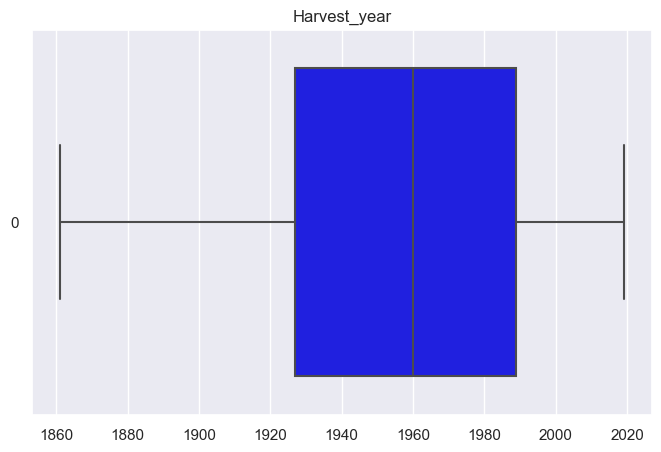

The median is:  179677.92
The mean is: 660998.1694192326


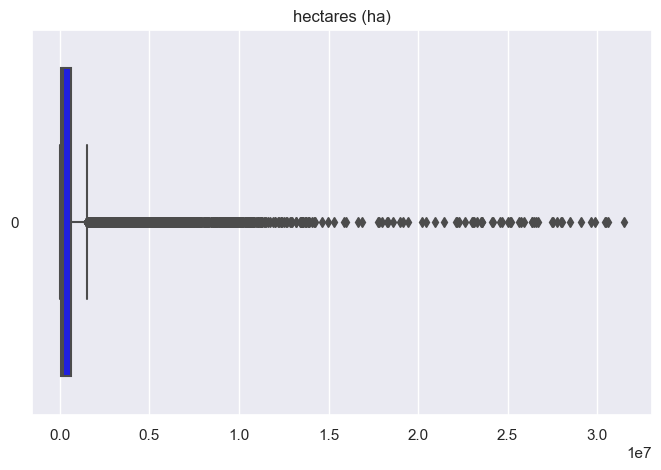

The median is:  333115.610711953
The mean is: 1638816.9535652723


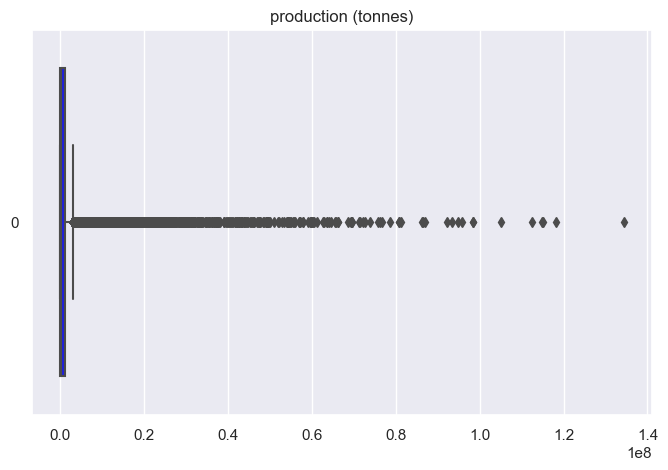

The median is:  1960.0
The mean is: 1956.143398109552


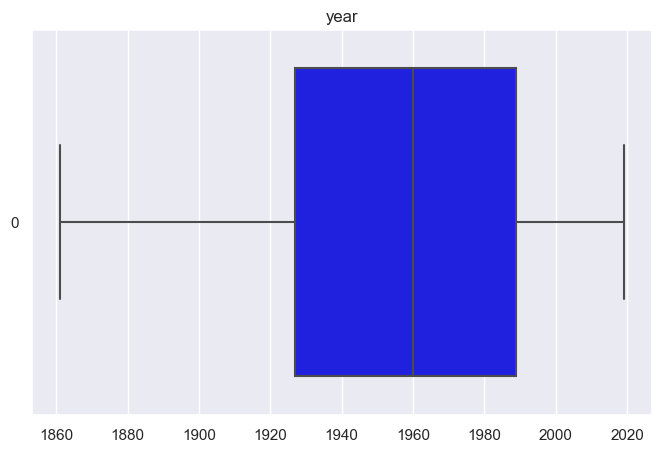

The median is:  1.883041353245194
The mean is: 2.6867739102923935


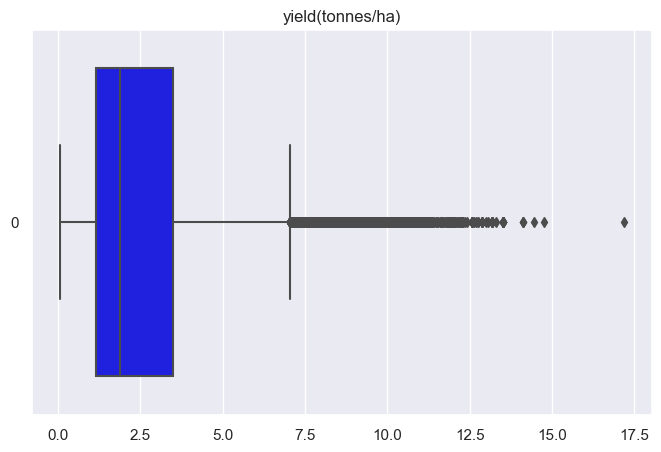

In [78]:
sns.set(rc={'figure.figsize':(8,5)})
for c in n_variables:
    x = df[c].values
    ax = sns.boxplot(x, orient='h', color= 'blue')
    print('The median is: ', df[c].median())
    print('The mean is:', df[c].mean())
    plt.title(c)
    plt.show()


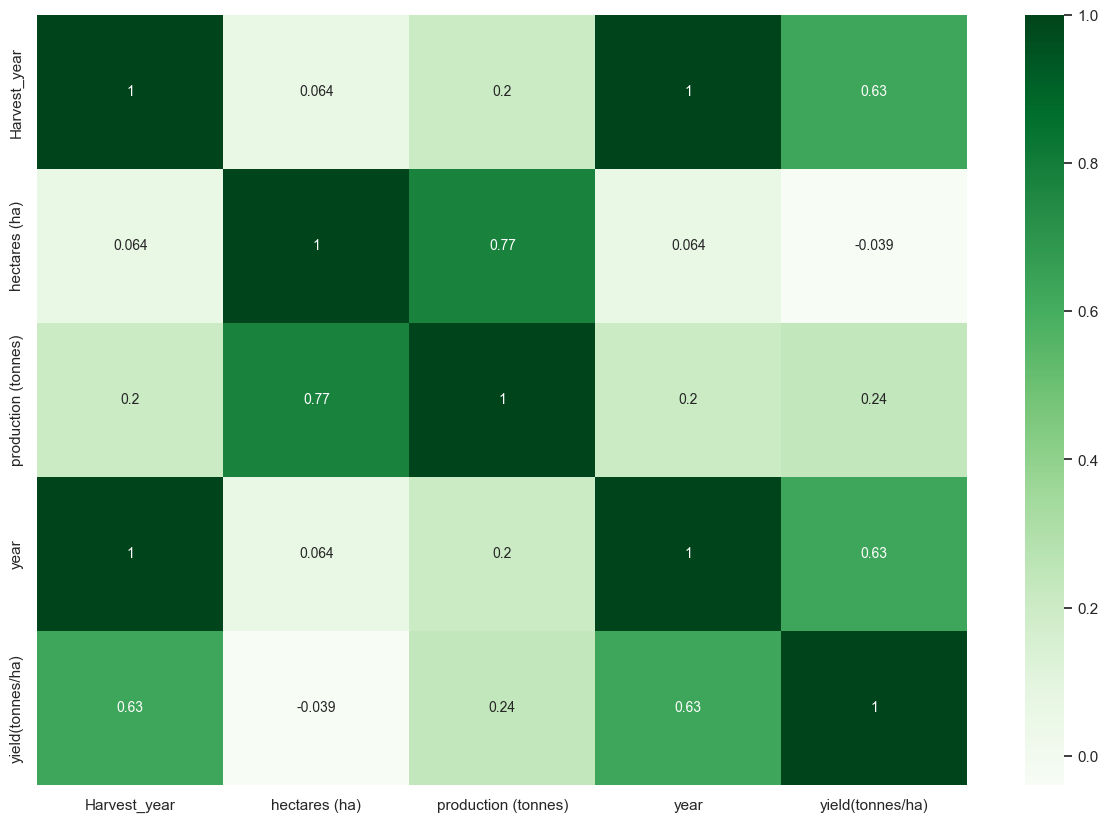

In [82]:
sns.set(rc={'figure.figsize':(15,10)})
pc =  df[n_variables].corr(method='pearson')
cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 10},
                 cmap="Greens")

In [83]:
pc

,Harvest_year,hectares (ha),production (tonnes),year,yield(tonnes/ha)
Harvest_year,1.000000,0.064375,0.200880,0.999995,0.630197
hectares (ha),0.064375,1.000000,0.773770,0.063877,-0.038934
production (tonnes),0.200880,0.773770,1.000000,0.200599,0.236045
year,0.999995,0.063877,0.200599,1.000000,0.630259
yield(tonnes/ha),0.630197,-0.038934,0.236045,0.630259,1.000000


In [90]:
df.columns

Index(['City', 'Country', 'Harvest_year', 'crop', 'hectares (ha)',
       'production (tonnes)', 'year', 'yield(tonnes/ha)'],
      dtype='object')

In [92]:
df_encoded = pd.get_dummies(df, columns=['crop'])
print(df_encoded.dtypes)
df_encoded.head()

City                    object
Country                 object
Harvest_year             int64
hectares (ha)          float64
production (tonnes)    float64
year                     int64
yield(tonnes/ha)       float64
crop_cereals             uint8
crop_maize               uint8
crop_spring wheat        uint8
crop_wheat               uint8
crop_winter wheat        uint8
dtype: object


City  Country  Harvest_year  hectares (ha)  production (tonnes)  \
CropStats 59  nan  Austria          1961       275822.0           711620.760   
          60  nan  Austria          1962       270351.0           706156.812   
          61  nan  Austria          1963       274722.0           689552.220   
          62  nan  Austria          1964       282967.0           750428.484   
          63  nan  Austria          1965       275654.0           660742.638   

              year  yield(tonnes/ha)  crop_cereals  crop_maize  \
CropStats 59  1961             2.580             0           0   
          60  1962             2.612             0           0   
          61  1963             2.510             0           0   
          62  1964             2.652             0           0   
          63  1965             2.397             0           0   

              crop_spring wheat  crop_wheat  crop_winter wheat  
CropStats 59                  0           1                  0  
          60                  0           1                  0  
          61                  0           1                  0  
          62                  0           1                  0  
          63                  0           1                  0

In [93]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Harvest_year','yield(tonnes/ha)', 'hectares (ha)', 'year']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Define your X (features) and Y (target)
X = df_encoded.drop(['production (tonnes)','City','Country'], axis=1)
y = df['production (tonnes)']

In [96]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print('The Accuracy  on the testing dataset is: ', model.score(X_test, y_test) )

Mean Squared Error: 9456849741601.658
The Accuracy  on the testing dataset is:  0.6780374704282857


In [97]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# List of regressors to try
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each regressor
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Regressor: {regressor.__class__.__name__}")
    print(f"Mean Squared Error: {mse}")
    print("R-squared:", r2)
    print()

# You can add more regressors to the 'regressors' list as needed


Regressor: LinearRegression
Mean Squared Error: 9456849741601.658
R-squared: 0.6780374704282857

Regressor: Ridge
Mean Squared Error: 9468485342144.807
R-squared: 0.6776413313876622



c:\Users\dinab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+17, tolerance: 6.545e+13
  model = cd_fast.enet_coordinate_descent(


Regressor: Lasso
Mean Squared Error: 9472538654919.932
R-squared: 0.677503334605448

Regressor: ElasticNet
Mean Squared Error: 12288891047019.764
R-squared: 0.581619402312765

Regressor: DecisionTreeRegressor
Mean Squared Error: 179450504897.70822
R-squared: 0.993890530137576

Regressor: RandomForestRegressor
Mean Squared Error: 105509274234.11531
R-squared: 0.9964078912371576

Regressor: SVR
Mean Squared Error: 31140767988255.473
R-squared: -0.06020088171629534

Regressor: KNeighborsRegressor
Mean Squared Error: 673383345285.8113
R-squared: 0.9770743734812727



c:\Users\dinab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Regressor: MLPRegressor
Mean Squared Error: 31065365131215.89
R-squared: -0.05763375891613043

Regressor: GradientBoostingRegressor
Mean Squared Error: 203938265742.92468
R-squared: 0.993056833754457



In [99]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Train a Random Forest Regressor model
model2 = RandomForestRegressor(random_state=15)  # You can adjust hyperparameters if needed
model2.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 102863852587.71463
R-squared: 0.9964979557584656


In [98]:
df.columns

Index(['City', 'Country', 'Harvest_year', 'crop', 'hectares (ha)',
       'production (tonnes)', 'year', 'yield(tonnes/ha)'],
      dtype='object')

In [57]:
filtered_df = grouped_data.loc[grouped_data['year'] == 2017]
print(filtered_df.sort_values(by="production (tonnes)", ascending=False))

              admin0  year  production (tonnes)
2385   United States  2017         4.559482e+08
760            China  2017         3.935749e+08
1131           India  2017         1.272300e+08
117        Argentina  2017         6.197796e+07
1013          France  2017         5.109660e+07
585           Canada  2017         4.407950e+07
263        Australia  2017         3.181874e+07
1480          Mexico  2017         3.126600e+07
475           Brazil  2017         3.004749e+07
2232  United Kingdom  2017         1.483837e+07
1873    South Africa  2017         1.474231e+07
1227       Indonesia  2017         1.171297e+07
1560         Morocco  2017         9.787246e+06
1355           Italy  2017         6.543045e+06
1971           Spain  2017         4.830281e+06
2098          Sweden  2017         3.298600e+06
377          Belgium  2017         1.702721e+06
320          Austria  2017         1.437143e+06
1677     Netherlands  2017         1.054000e+06
2496         Uruguay  2017         9.110

In [40]:
# Group the data by the 'admin0' column and count the number of rows in each group
grouped_data = df.groupby(['admin0', 'year'])['production (tonnes)'].sum().reset_index()
grouped_data
# # Print the resulting dataframe
# print(grouped_data['year'] == 2018)
# print(df['year'].value_counts())

,admin0,year,production (tonnes)
0,Argentina,1900,2034438.0
1,Argentina,1901,1534405.0
2,Argentina,1902,2823853.0
3,Argentina,1903,3529100.0
4,Argentina,1904,4102600.0
...,...,...,...
2855,Uruguay,2015,1670500.0
2856,Uruguay,2016,1244000.0
2857,Uruguay,2017,911000.0
2858,Uruguay,2018,1036600.0


In [33]:
filtered_df = grouped_data.loc[grouped_data['year'] == 2017]
print(filtered_df.sort_values(by="production (tonnes)", ascending=False))


              admin0  year  production (tonnes)
2736   United States  2017         4.559482e+08
878            China  2017         3.935749e+08
1457           India  2017         1.272300e+08
1339          France  2017         5.109660e+07
703           Canada  2017         4.407950e+07
263        Australia  2017         3.181874e+07
1830          Mexico  2017         3.126600e+07
593           Brazil  2017         3.004749e+07
117        Argentina  2017         1.851804e+07
2223    South Africa  2017         1.474231e+07
1553       Indonesia  2017         1.171297e+07
1910         Morocco  2017         9.787246e+06
1705           Italy  2017         6.543045e+06
2322           Spain  2017         4.830281e+06
2449          Sweden  2017         3.298600e+06
495          Belgium  2017         1.702721e+06
379          Austria  2017         1.437143e+06
2027     Netherlands  2017         1.054000e+06
2857         Uruguay  2017         9.110000e+05
1221         Finland  2017         8.020